In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [2]:
path = r"C:/Users/Douglas/Documents/DataBootCamp/FinalGroupProject/nfl-combine"
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True,sort=False)

In [3]:
frame['Team'] = frame['Drafted (tm/rnd/yr)'].str.split("/", n = 4, expand = True) [0].str.strip()
frame['Round'] = frame['Drafted (tm/rnd/yr)'].str.split("/", n = 4, expand = True) [1].str.replace(r'[a-zA-Z]', '').astype(float)
frame['Pick'] = frame['Drafted (tm/rnd/yr)'].str.split("/", n = 4, expand = True) [2].str.replace(r'[a-zA-Z]', '').astype(float)
frame['Height'] = frame['Height'].str.split("-", n = 2, expand = True) [0].astype(float)*12 + frame['Height'].str.split("-", n = 2, expand = True) [1].astype(float)
frame.to_csv("C:/Users/Douglas/Documents/DataBootCamp/FinalGroupProject/nfl-combine/Combined.csv", index=False, header=True)

In [4]:
combine = frame[["Rk", "AV","Height","Wt","40YD","Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Pos","Pick","Round"]].dropna(how='any')
combine = pd.get_dummies(combine)
combine = combine.dropna(how='any')

In [5]:
# Assign the data to X and y
X = combine[["Rk", "AV","Height","Wt","40YD","Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Pos_CB","Pos_DE","Pos_DT","Pos_FB","Pos_FS","Pos_ILB","Pos_OG","Pos_OLB","Pos_OT","Pos_QB","Pos_RB","Pos_SS","Pos_TE","Pos_WR"]]
y = combine["Pick"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1668, 24) (1668, 1)


In [6]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [7]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [8]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.26411898135151723
Testing Score: 0.26318657749194074


In [9]:
model.coef_

array([[-3.17399703e-02, -1.10585046e+00,  2.39386544e+00,
        -1.13127931e+00,  8.25363255e+01,  6.48821841e-01,
        -5.26454999e-01, -1.77718301e+00,  2.46651089e+01,
        -6.20744380e+00, -2.98304347e+01,  8.65878551e+00,
         1.19966284e+01,  2.18360711e+01, -1.45965489e+01,
         1.28625344e+01,  4.21294575e+00,  6.95762002e+00,
         9.47427491e-01, -2.90218989e+01,  5.03160890e+00,
         6.61709878e+00,  6.29991955e+00, -1.19717573e+01]])

In [10]:
model.intercept_

array([-108.00627721])

Text(0.5, 1.0, 'Residual Plot')

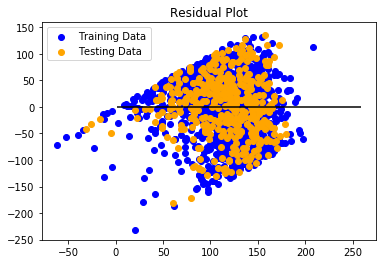

In [11]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [ ]:
# Assign the data to X and y
X = combine[["Rk", "AV","Height","Wt","40YD","Vertical","BenchReps","Broad Jump","3Cone","Shuttle","Pos_CB","Pos_DE","Pos_DT","Pos_FB","Pos_FS","Pos_ILB","Pos_OG","Pos_OLB","Pos_OT","Pos_QB","Pos_RB","Pos_SS","Pos_TE","Pos_WR"]]
y = combine["Pick"].values.reshape(-1, 1)
print(X.shape, y.shape)

In [ ]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
### END SOLUTION